# Exploratory Data Analysis

## Data Preprocessing

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")
group_stats = data.groupby("Work_Location", observed=True)['Work_Life_Balance_Rating'].describe().reset_index()

In [30]:
print(data.shape)

(5000, 20)


#### Check for Missing Values

In [24]:
data.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

We have missing values for the columns Mental_Health_Condition and Physical_Activity, which is fine since we are only looking at the columns Work_Life_Balance_Rating and Work_Location, and these columns have no missing values.

## Descriptive Statistics for Work Life Balance Rating by Work Location

In [18]:
decimal_format = {
    "count": "{:.0f}",
    "mean": "{:.2f}",
    "std": "{:.2f}",
    "min": "{:.0f}",
    "25%": "{:.0f}",
    "50%": "{:.0f}",
    "75%": "{:.0f}",
    "max": "{:.0f}"
}

styled_table = group_stats.style.set_properties(**{
    'border': '1px solid black',
    'padding': '5px',
    'font-size': '12pt',
    'background-color': '#f9f9f9'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#d9d9d9'), ('border', '1px solid black'), ('padding', '5px')]}
]).format(decimal_format)  # Apply decimal formatting

display(styled_table)

,Work_Location,count,mean,std,min,25%,50%,75%,max
0,Hybrid,1649,3.02,1.41,1,2,3,4,5
1,Onsite,1637,2.95,1.39,1,2,3,4,5
2,Remote,1714,2.98,1.43,1,2,3,4,5


## Data Visualizations

#### Boxplots for Work Life Balance Rating by Work Location

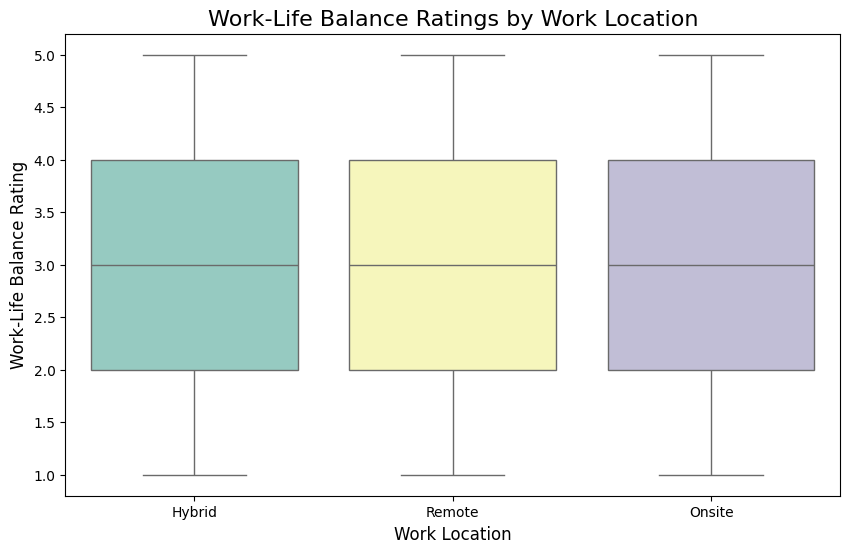

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Work_Location', y='Work_Life_Balance_Rating', hue='Work_Location', palette='Set3', legend=False)

# Add labels and title
plt.title('Work-Life Balance Ratings by Work Location', fontsize=16)
plt.xlabel('Work Location', fontsize=12)
plt.ylabel('Work-Life Balance Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

From the boxplot, we can see that there are no outliers, which makes sense as the participants can only choose a number from 1-5.

#### Count Plot for Each Work Location

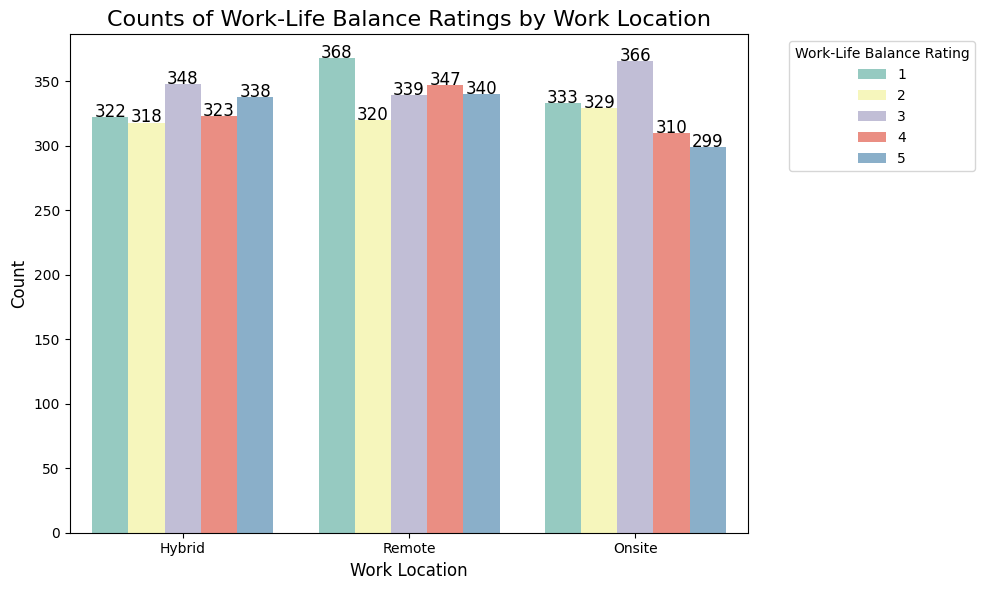

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=data,
    x='Work_Location',
    hue='Work_Life_Balance_Rating',
    palette='Set3'
)

# Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add the count if the bar height is greater than 0
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position (center of the bar)
            height + 0.07,  # Y position (slightly above the bar)
            f'{int(height)}',  # Display the count as integer
            ha='center',  # Horizontal alignment
            fontsize=12
        )

# Add labels, title, and legend
plt.title('Counts of Work-Life Balance Ratings by Work Location', fontsize=16)
plt.xlabel('Work Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Work-Life Balance Rating', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()